  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Delhi House Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

## *Problem Statement*:
The objective of the dataset is to Predict the Price of Delhi House


## *Data Definition*:

Attribute Information:

1. **Area**: Area of the Property in square feet
2. **BHK**: No. of Bedrooms along with 1 Hall and 1 Kitchen
3. **Bathroom**: No. of Bathroom
4. **Furnishing**: Whether listed property is furnished, unfurnished or semi-furnished
5. **Locality**: Locality in which property lies
6. **Parking**: No. of parking available
7. **Price**: This is the Price of property in INR
8. **Status**: Property's status as in 'ready to move' or still under construction
9. **Transaction**: Its a new property or being re-sold
10. **Type**: Its an Apartment or Builder Floor
11. **Per_Sqft**: Price per square feet

## *Table of Contents*

1. **Required Libraries**
2. **Read Data**
3. **Exploratory Data Analysis**
    - 3.1 - Understand the Data
        - 3.1.1 - Data Information
        - 3.1.2 - Summary Statistics
        - 3.1.3 - Missing Value Handling
        - 3.1.4 - Analyzing and Cleaning the Data 
        - 3.1.5 - Analyzing the Target Variable
        - 3.1.6 - Covariance
        - 3.1.7 - Correlation
    - 3.2 - Data Preparation
        - 3.2.1 - Encoding Categorical Variables
        - 3.2.2 - Feature Scaling
        - 3.2.3 - Splitting the Data
4. **Linear Regression Models**
    - 4.1 - Linear Regression Model using Ordinary Least-Squares
    - 4.2 - Linear Regression Model using Stochastic Gradient Descent
    - 4.3 - Linear Regression Model using Random Forest
    - 4.4 - Linear Regression Model using Gradient Boosting
        - 4.4.1 - Hyperparameter Tuning for Gradient Boosting
    - 4.5 - Linear Regression Model using XG Boosting
        - 4.4.1 - Hyperparameter Tuning for XG Boosting



5. **Conclusion**
6. **Save the Model**

# **1. Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV




from warnings import filterwarnings
filterwarnings('ignore')


# **2. Read Data**

In [2]:
# read the data
data = pd.read_csv('MagicBricks.csv')

# print the first five rows of the dataset
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
# print the random ten sample rows of the dataset
data.sample(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
436,1800.0,3,3.0,Furnished,"Patel Nagar East, Patel Nagar",3.0,50000000,Ready_to_move,Resale,Apartment,27778.0
403,1000.0,3,2.0,Semi-Furnished,Uttam Nagar,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6111.0
242,6000.0,5,5.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",9.0,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0
1091,450.0,1,1.0,Unfurnished,"Panchsheel Vihar, Sheikh Sarai",1.0,2200000,Ready_to_move,New_Property,Apartment,10556.0
611,1100.0,3,2.0,Semi-Furnished,Paschim Vihar,2.0,13100000,Ready_to_move,Resale,Apartment,14722.0
1164,1300.0,2,2.0,Semi-Furnished,"Yamuna Apartment, Alaknanda",1.0,15000000,Ready_to_move,Resale,Apartment,11538.0
545,2050.0,4,4.0,Semi-Furnished,Saket,1.0,47500000,Ready_to_move,New_Property,Builder_Floor,28846.0
268,7200.0,4,4.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",2.0,120000000,Ready_to_move,Resale,Builder_Floor,16667.0
385,810.0,3,2.0,Semi-Furnished,Laxmi Nagar,1.0,9000000,Ready_to_move,Resale,Builder_Floor,11111.0
621,1350.0,3,3.0,Semi-Furnished,"Pushkar Enclave, Paschim Vihar",1.0,15000000,Ready_to_move,Resale,Builder_Floor,11111.0


# **3. Exploratory Data Analysis**


## 3.1. Understanding the Data

In [4]:
# check the data information for the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
# check the shape of dataset
data.shape

(1259, 11)

#### Summary Statistics

In [6]:
# check the statistical summary of each attribute.

# statistical summary for numerical variable
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [7]:
# statistical summary for categorical variable

data.describe(include='object')

,Furnishing,Locality,Status,Transaction,Type
count,1254,1259,1259,1259,1254
unique,3,365,2,2,2
top,Semi-Furnished,Lajpat Nagar 3,Ready_to_move,Resale,Builder_Floor
freq,708,34,1184,781,661


### Missing Value Handling

In [8]:
# get the count of missing values in descending order
data.isnull().sum().sort_values(ascending=False)

Per_Sqft       241
Parking         33
Furnishing       5
Type             5
Bathroom         2
Area             0
BHK              0
Locality         0
Price            0
Status           0
Transaction      0
dtype: int64

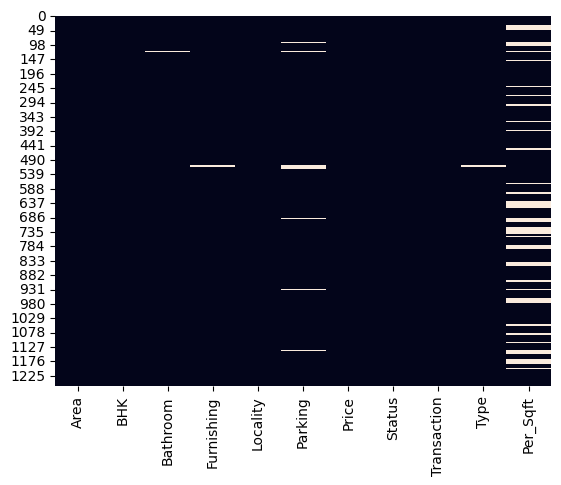

In [9]:
# visualize missing values using a heatmap
sns.heatmap(data.isnull(), cbar=False)

plt.show()

In [10]:
# use the function fillna() to fill the missing values

# fill the null value by '0' for 'Parking' and equal to number of BHK for 'Bathroom'
data['Bathroom'] = data['Bathroom'].fillna(data.BHK)
data['Parking'] = data['Parking'].fillna(0)

# recheck the null values
print(data['Bathroom'].isnull().sum())
print(data['Parking'].isnull().sum())

0
0


In [11]:
# fill the null value by mode for 'Type'

data['Type'] = data['Type'].fillna(data['Type'].mode()[0])
data['Type'].isnull().sum()

0

In [12]:
# fill the null value by 'Unfurnished' for 'Furnishing' column
 
data['Furnishing'] = data['Furnishing'].fillna('Unfurnished')
data['Furnishing'].isnull().sum()

0

In [13]:
# fill the null value of 'Per_Sqft' by using the 'Price' and 'Area' column.
# here, ' Per_Sqft = Price/Area '

data['Per_Sqft'] = data['Per_Sqft'].fillna(data['Price']/data['Area'])
data['Per_Sqft'].isnull().sum()

0

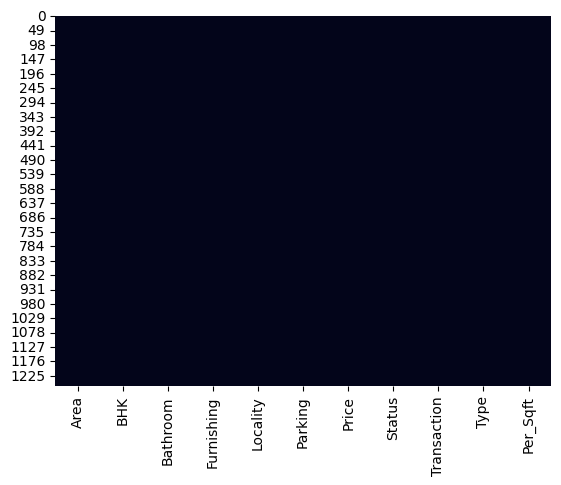

In [14]:
# re-check the null values in data
sns.heatmap(data.isnull(), cbar=False)

plt.show()

### Analyzing and Cleaning the Data

In [15]:
data.shape

(1259, 11)

In [16]:
# check the value count of each unique values in 'Locality' column

data['Locality'].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                       

In [17]:
# drop the 'Locality' column
data = data.drop('Locality', axis=1)

# checking the shape of dataset
data.shape

(1259, 10)

In [18]:
# check the value count of each unique values in 'Area' column
data['Area'].value_counts()

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64

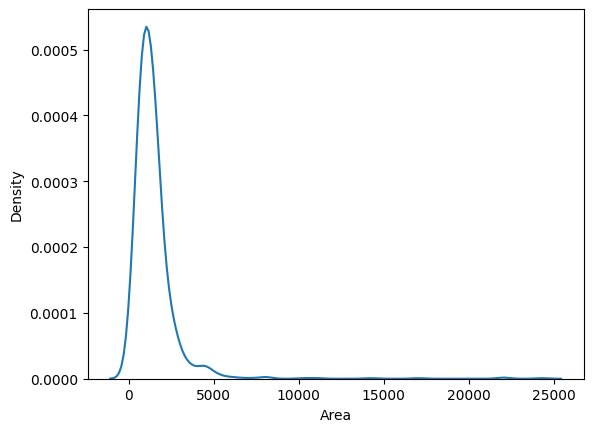

In [19]:
# plotting the distribution of the data of "Area" 
sns.kdeplot(x = data['Area'], palette = "rainbow")
plt.show()

In [20]:
data[data['Area']>=6000]

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
57,8000.0,4,5.0,Semi-Furnished,1.0,240000000,Ready_to_move,New_Property,Builder_Floor,22000.0
109,8000.0,4,5.0,Semi-Furnished,1.0,240000000,Ready_to_move,New_Property,Builder_Floor,20000.0
234,22050.0,4,4.0,Semi-Furnished,2.0,51000000,Almost_ready,New_Property,Builder_Floor,30556.0
242,6000.0,5,5.0,Semi-Furnished,9.0,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0
248,10350.0,4,7.0,Semi-Furnished,3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
255,8150.0,4,5.0,Unfurnished,4.0,170000000,Ready_to_move,New_Property,Builder_Floor,15459.0
268,7200.0,4,4.0,Semi-Furnished,2.0,120000000,Ready_to_move,Resale,Builder_Floor,16667.0
504,22050.0,4,4.0,Semi-Furnished,2.0,51000000,Almost_ready,New_Property,Builder_Floor,30556.0
567,24300.0,4,5.0,Semi-Furnished,2.0,51000000,Ready_to_move,Resale,Builder_Floor,12500.0
626,14220.0,3,3.0,Semi-Furnished,1.0,27500000,Ready_to_move,New_Property,Builder_Floor,10943.0


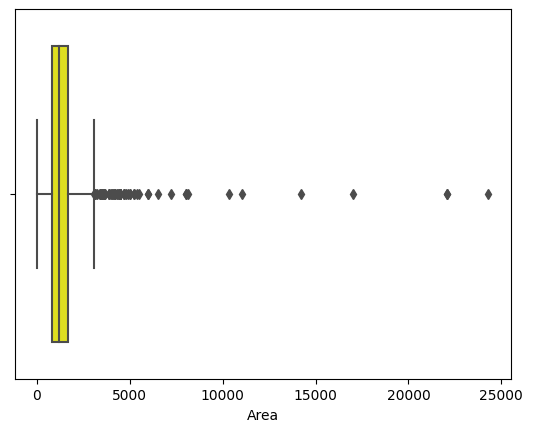

In [21]:
sns.boxplot(x='Area', data=data, color='yellow')
plt.show()

In [22]:
# removing the houses having 'Area' greater than 5000 Sqft 
data = data[data['Area']<=5000]

In [23]:
data[data['Area']<300]

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
28,28.0000,2,2.0,Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,8750.0
153,100.0000,3,2.0,Furnished,1.0,4300000,Ready_to_move,New_Property,Builder_Floor,43000.0
157,75.0000,2,2.0,Semi-Furnished,1.0,3000000,Ready_to_move,Resale,Builder_Floor,40000.0
158,270.0000,2,1.0,Semi-Furnished,1.0,1400000,Ready_to_move,Resale,Apartment,5185.0
238,45.0000,4,3.0,Unfurnished,1.0,5500000,Ready_to_move,New_Property,Builder_Floor,18750.0
341,70.0000,1,2.0,Unfurnished,1.0,4500000,Ready_to_move,Resale,Apartment,5357.0
386,270.0000,1,1.0,Semi-Furnished,1.0,2300000,Ready_to_move,Resale,Builder_Floor,11111.0
421,70.0000,2,3.0,Furnished,1.0,8200000,Ready_to_move,New_Property,Builder_Floor,23840.0
430,100.0000,3,2.0,Semi-Furnished,2.0,16000000,Ready_to_move,Resale,Apartment,160000.0
432,270.0000,1,1.0,Unfurnished,2.0,1700000,Ready_to_move,Resale,Builder_Floor,11556.0


In [24]:
# removing the houses having 'Area' less than 300 Sqft 

data = data[data['Area']>=300]

In [25]:
# check the unique values in 'BHK'
data.BHK.unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

In [26]:
# check the value count of each unique values in 'BHK' column
data['BHK'].value_counts()

3     527
2     359
4     208
1      86
5      21
6       5
7       1
10      1
Name: BHK, dtype: int64

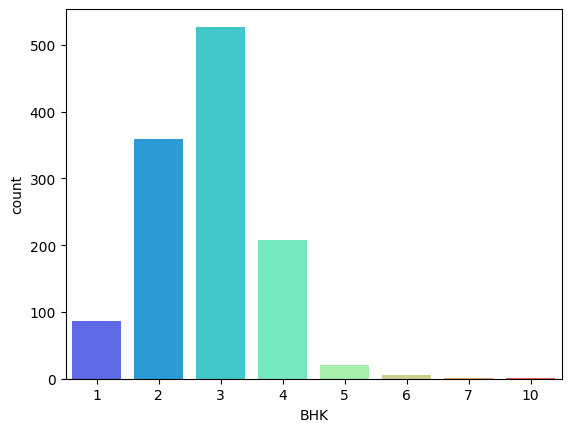

In [27]:
sns.countplot(x = data['BHK'], palette = "rainbow")
plt.show()

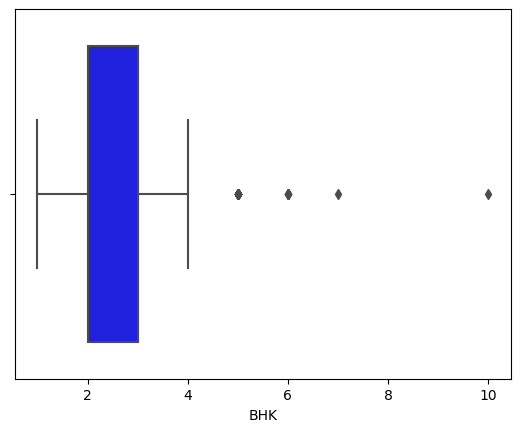

In [28]:
sns.boxplot(x='BHK', data=data, color='blue')
plt.show()

In [29]:
data[data['BHK']>5]

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,Furnished,1.0,5100000,Ready_to_move,Resale,Builder_Floor,1259.000000
164,2400.0,6,4.0,Furnished,1.0,6000000,Ready_to_move,Resale,Builder_Floor,2500.000000
261,2800.0,6,4.0,Semi-Furnished,2.0,29500000,Ready_to_move,Resale,Apartment,15459.000000
345,2970.0,7,4.0,Furnished,1.0,26500000,Ready_to_move,Resale,Builder_Floor,8923.000000
352,324.0,6,3.0,Furnished,1.0,8700000,Ready_to_move,Resale,Builder_Floor,35714.000000
353,720.0,6,5.0,Furnished,1.0,22000000,Ready_to_move,Resale,Builder_Floor,35714.000000
721,1200.0,10,4.0,Semi-Furnished,2.0,17000000,Ready_to_move,Resale,Apartment,14166.666667


In [30]:
# removing the houses having 'BHK' more than 5 

data = data[data['BHK']<=5]

In [31]:
# check the unique values in 'Bathroom'
data.Bathroom.unique()

array([2., 3., 4., 1., 5., 6.])

In [32]:
# check the value count of each unique values in 'Bathroom' column

data['Bathroom'].value_counts()

2.0    540
3.0    344
1.0    134
4.0    130
5.0     48
6.0      5
Name: Bathroom, dtype: int64

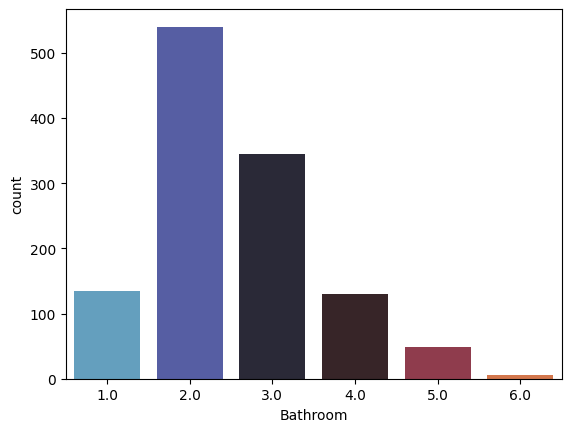

In [33]:
sns.countplot(x = data['Bathroom'], palette = "icefire")
plt.show()

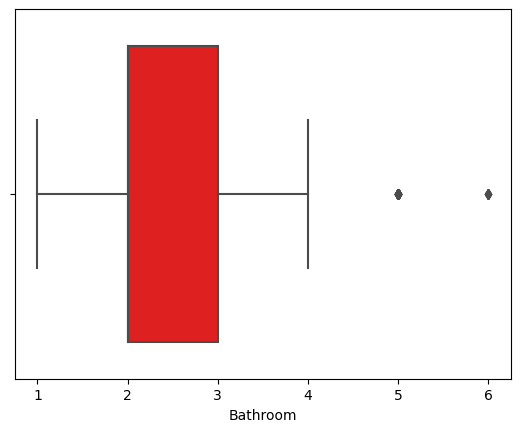

In [34]:
sns.boxplot(x='Bathroom', data=data, color='red')
plt.show()

In [35]:
data[data['Bathroom']>5]

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
527,810.0,5,6.0,Furnished,1.0,28900000,Ready_to_move,Resale,Apartment,6667.0
659,3050.0,5,6.0,Semi-Furnished,0.0,62500000,Ready_to_move,Resale,Apartment,20492.0
676,3112.0,5,6.0,Semi-Furnished,3.0,60000000,Ready_to_move,Resale,Apartment,19280.0
681,2300.0,5,6.0,Semi-Furnished,3.0,58000000,Ready_to_move,Resale,Apartment,21311.0
1211,4350.0,4,6.0,Semi-Furnished,2.0,135000000,Ready_to_move,New_Property,Apartment,170000.0


In [36]:
# removing the houses having 'Bathroom' more than 5
data = data[data.Bathroom<=5]

In [37]:
# check the unique values of 'Furnishing' 
data.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [38]:
# check the value count of each unique values in 'Furnishing' column
data['Furnishing'].value_counts()

Semi-Furnished    677
Unfurnished       347
Furnished         172
Name: Furnishing, dtype: int64

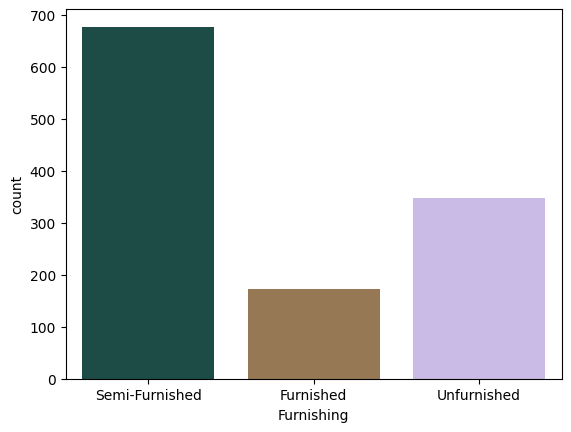

In [39]:
sns.countplot(x = data['Furnishing'], palette = "cubehelix")
plt.show()

Furnishing
Furnished         1.703930e+07
Semi-Furnished    2.106725e+07
Unfurnished       1.864914e+07
Name: Price, dtype: float64 



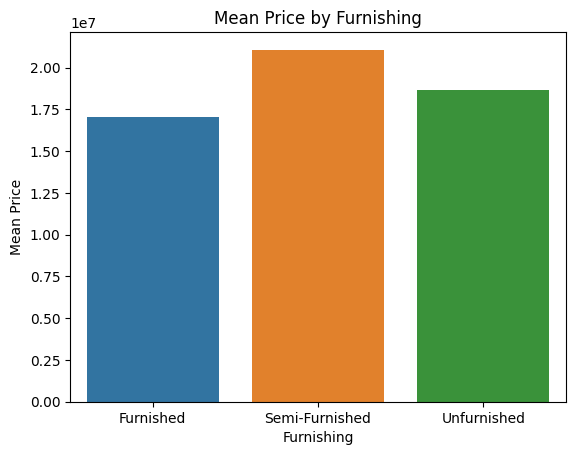

In [40]:
# grouping the 'Furnishing' types by price
grouped_Furnishing = data.groupby('Furnishing')
mean_Furnishing = grouped_Furnishing['Price'].mean()
print(mean_Furnishing,'\n')

# Create a bar plot
sns.barplot(x = mean_Furnishing.index, y = mean_Furnishing.values, )

# Set axis labels and title
plt.xlabel('Furnishing')
plt.ylabel('Mean Price')
plt.title('Mean Price by Furnishing')

# Display the plot
plt.show()

In [41]:
# check the unique values of 'Parking'
data['Parking'].unique()

array([  1.,   5.,   2.,   0.,   4.,   3.,  39.,  10., 114.])

In [42]:
# check the value count of each unique values in 'Parking' column
data['Parking'].value_counts()

1.0      761
2.0      327
3.0       48
0.0       31
4.0       13
5.0        7
39.0       5
114.0      3
10.0       1
Name: Parking, dtype: int64

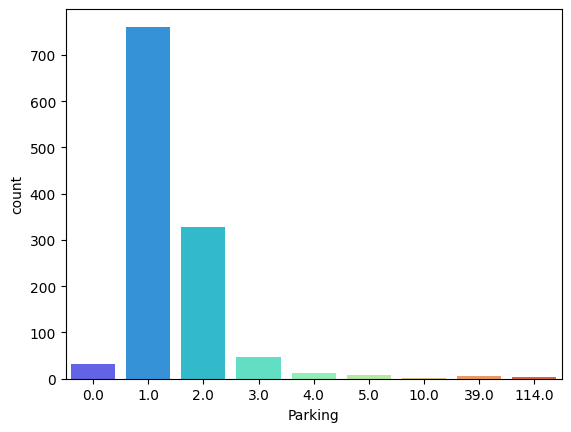

In [43]:
sns.countplot(x = data['Parking'], palette = "rainbow")
plt.show()

In [44]:
data[data['Parking']>5]

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
875,365.00,1,1.0,Unfurnished,39.0,3500000,Ready_to_move,Resale,Apartment,7143.000000
876,390.00,1,1.0,Unfurnished,39.0,2000000,Ready_to_move,Resale,Apartment,5128.000000
877,350.00,1,1.0,Unfurnished,39.0,3000000,Ready_to_move,Resale,Apartment,5128.000000
880,500.00,1,1.0,Unfurnished,39.0,1800000,Ready_to_move,Resale,Apartment,3600.000000
881,350.00,1,1.0,Unfurnished,39.0,1600000,Ready_to_move,Resale,Apartment,4571.000000
941,1076.39,3,2.0,Unfurnished,10.0,9300000,Ready_to_move,Resale,Builder_Floor,8640.000000
969,900.00,2,2.0,Unfurnished,114.0,9000000,Ready_to_move,Resale,Apartment,10000.000000
970,1100.00,2,2.0,Semi-Furnished,114.0,10000000,Ready_to_move,Resale,Apartment,9090.909091
971,950.00,2,2.0,Unfurnished,114.0,8100000,Ready_to_move,Resale,Apartment,8526.315789


In [45]:
# check the unique value of 'Status'
data.Status.unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [46]:
# check the value count of each unique values in 'Status' column
data['Status'].value_counts()

Ready_to_move    1127
Almost_ready       69
Name: Status, dtype: int64

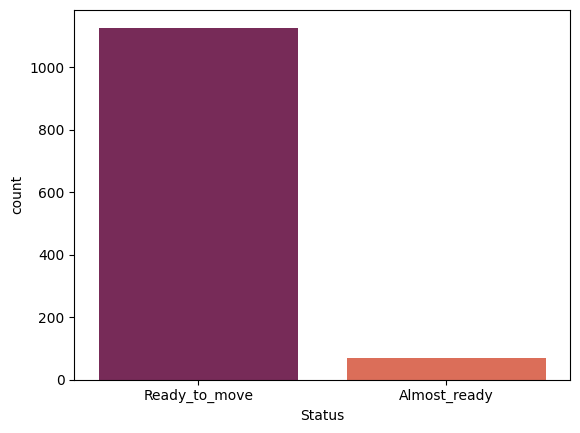

In [47]:
sns.countplot(x = data['Status'], palette = "rocket")
plt.show()

Status
Almost_ready     3.585087e+07
Ready_to_move    1.880287e+07
Name: Price, dtype: float64 



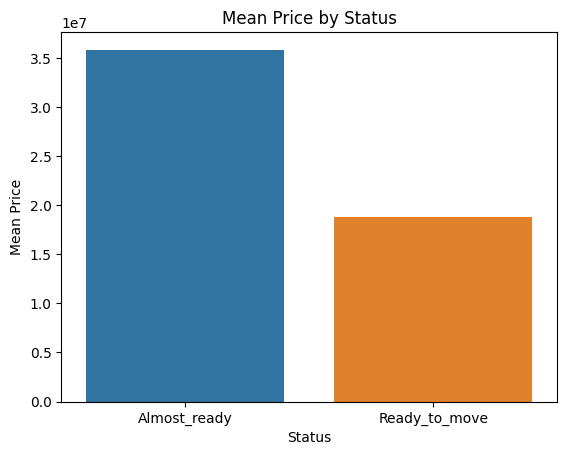

In [48]:
# grouping the 'Status' types by Price
grouped_Status = data.groupby('Status')
mean_Status = grouped_Status['Price'].mean()
print(mean_Status,'\n')

# Create a bar plot
sns.barplot(x = mean_Status.index, y = mean_Status.values, )

# Set axis labels and title
plt.xlabel('Status')
plt.ylabel('Mean Price')
plt.title('Mean Price by Status')

# Display the plot
plt.show()

In [49]:
# check the unique value of 'Transaction'
data.Transaction.unique()

array(['New_Property', 'Resale'], dtype=object)

In [50]:
# check the value count of each unique values in 'Transaction' column
data['Transaction'].value_counts()

Resale          747
New_Property    449
Name: Transaction, dtype: int64

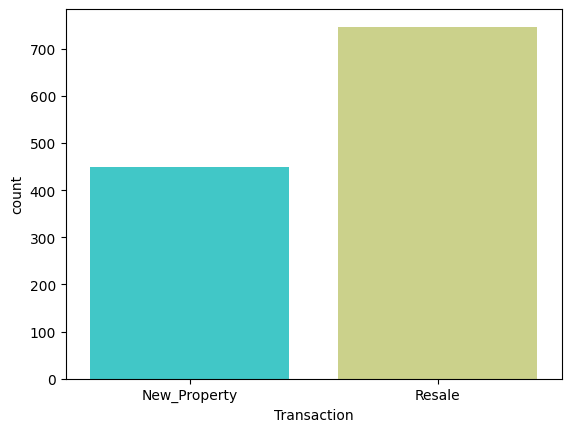

In [51]:
sns.countplot(x = data['Transaction'], palette = "rainbow")
plt.show()

Transaction
New_Property    2.532886e+07
Resale          1.645499e+07
Name: Price, dtype: float64 



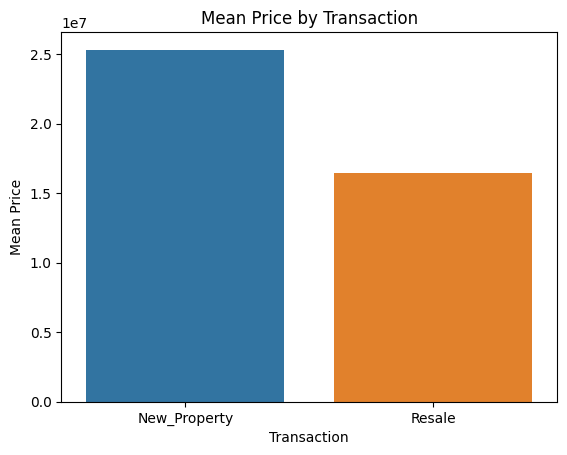

In [52]:
# grouping the 'Transaction' types by price
grouped_Transaction = data.groupby('Transaction')
mean_Transaction = grouped_Transaction['Price'].mean()
print(mean_Transaction,'\n')

# Create a bar plot
sns.barplot(x = mean_Transaction.index, y = mean_Transaction.values, )

# Set axis labels and title
plt.xlabel('Transaction')
plt.ylabel('Mean Price')
plt.title('Mean Price by Transaction')

# Display the plot
plt.show()

In [53]:
# check the unique value of 'Type'
data.Type.unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [54]:
# check the value count of each unique values in 'Type' column

data['Type'].value_counts()

Builder_Floor    631
Apartment        565
Name: Type, dtype: int64

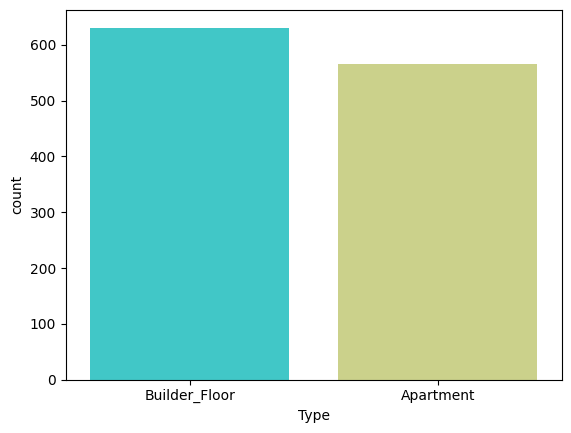

In [55]:
sns.countplot(x = data['Type'], palette = "rainbow")
plt.show()

Type
Apartment        1.730195e+07
Builder_Floor    2.201100e+07
Name: Price, dtype: float64 



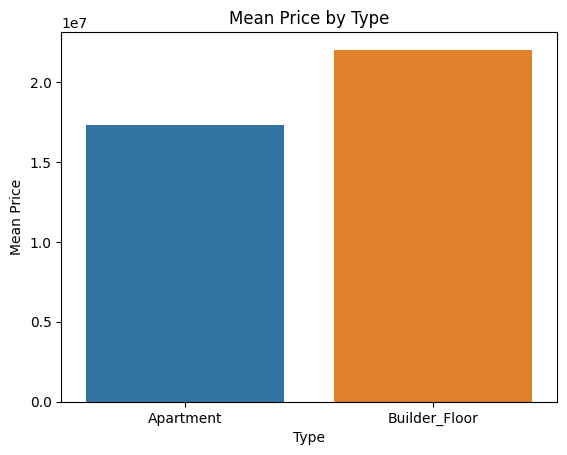

In [56]:
grouped_Type = data.groupby('Type')
mean_Type = grouped_Type['Price'].mean()
print(mean_Type,'\n')

# Create a bar plot
sns.barplot(x = mean_Type.index, y = mean_Type.values, )

# Set axis labels and title
plt.xlabel('Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Type')

# Display the plot
plt.show()

In [57]:
# check the value count of each unique values in 'Per_Sqft' column

data['Per_Sqft'].value_counts()

12500.000000    36
3524.000000     28
6667.000000     23
14818.000000    22
7000.000000     18
                ..
5478.260870      1
5650.000000      1
6701.030928      1
7037.037037      1
7272.727273      1
Name: Per_Sqft, Length: 422, dtype: int64

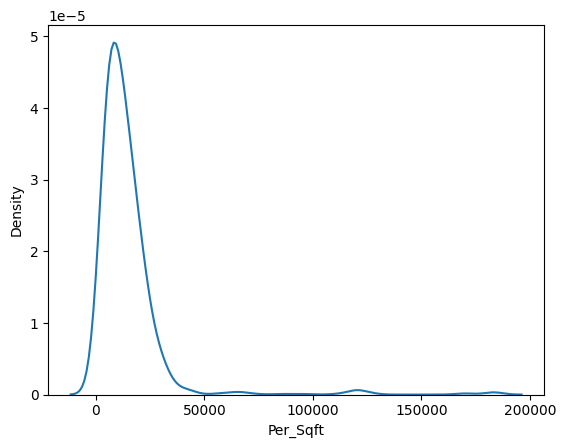

In [58]:
sns.kdeplot(x = data['Per_Sqft'], palette = "rainbow")
plt.show()

<AxesSubplot: xlabel='Per_Sqft'>

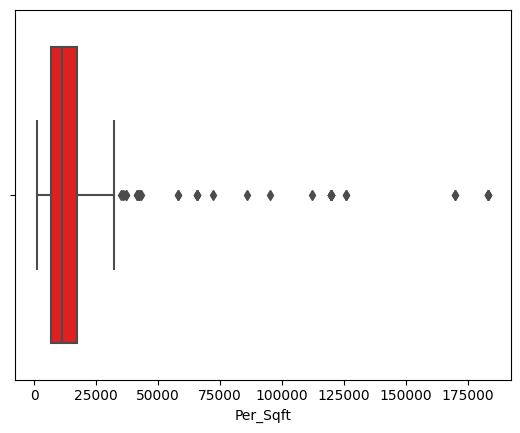

In [59]:
sns.boxplot(x='Per_Sqft', data= data, color='red')

In [60]:
data[data['Per_Sqft']>50000].shape


(25, 10)

### Analyzing the Target Variable

In [61]:
# check the value count of each unique values in 'Price' column
data['Price'].value_counts()

15000000    30
30000000    21
25000000    20
20000000    20
6000000     19
            ..
33700000     1
30500000     1
2670000      1
10200000     1
22200000     1
Name: Price, Length: 268, dtype: int64

In [62]:
data['Price'].describe()

count    1.196000e+03
mean     1.978640e+07
std      1.996872e+07
min      1.000000e+06
25%      5.897500e+06
50%      1.420000e+07
75%      2.500000e+07
max      1.355000e+08
Name: Price, dtype: float64

<AxesSubplot: xlabel='Price'>

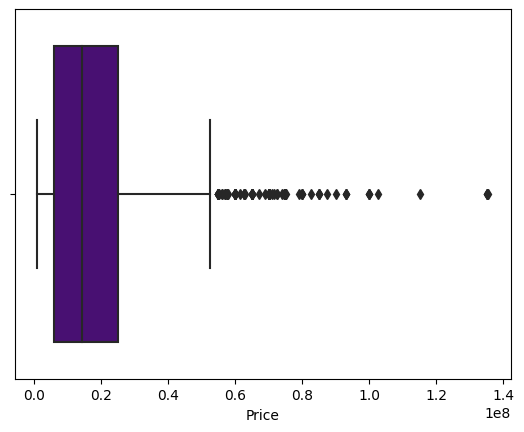

In [63]:
sns.boxplot(x = 'Price', data=data, color='indigo')

In [64]:
data[data['Price']>100000000].shape

(6, 10)

<AxesSubplot: xlabel='Price', ylabel='Density'>

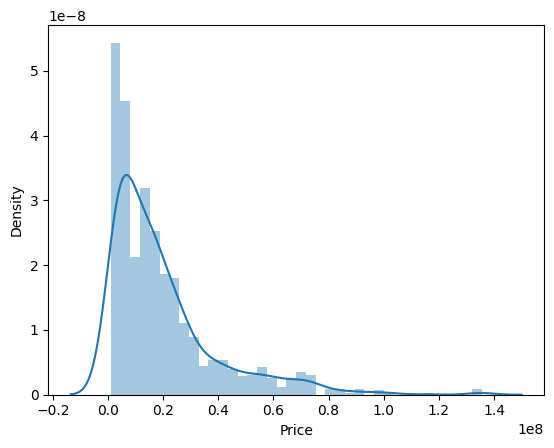

In [65]:
# plot the distibution of 'Price'
sns.distplot(data.Price)

### Covariance

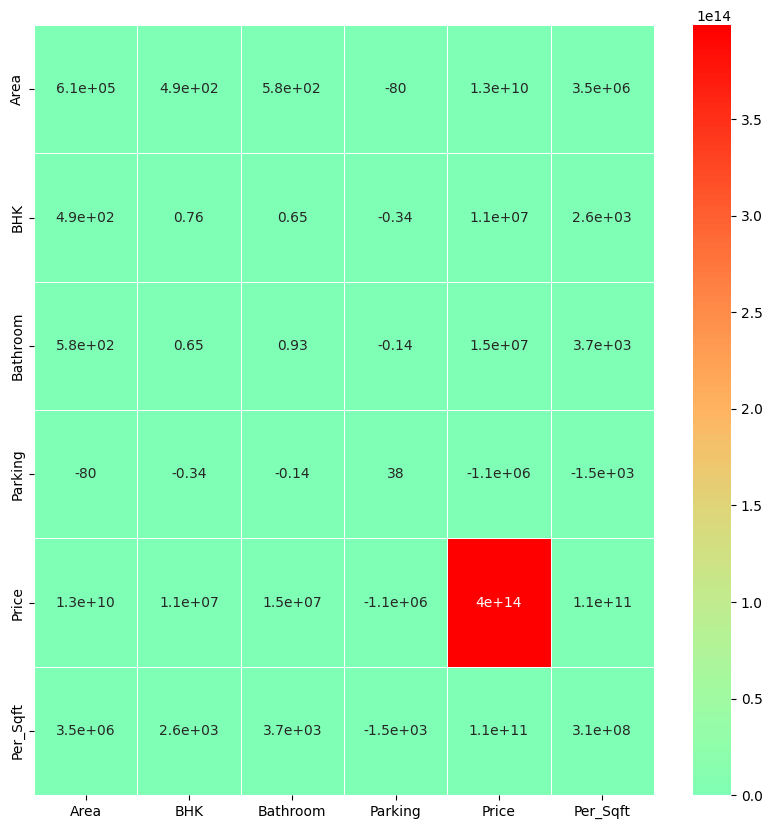

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(data.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

### Correlation

<AxesSubplot: >

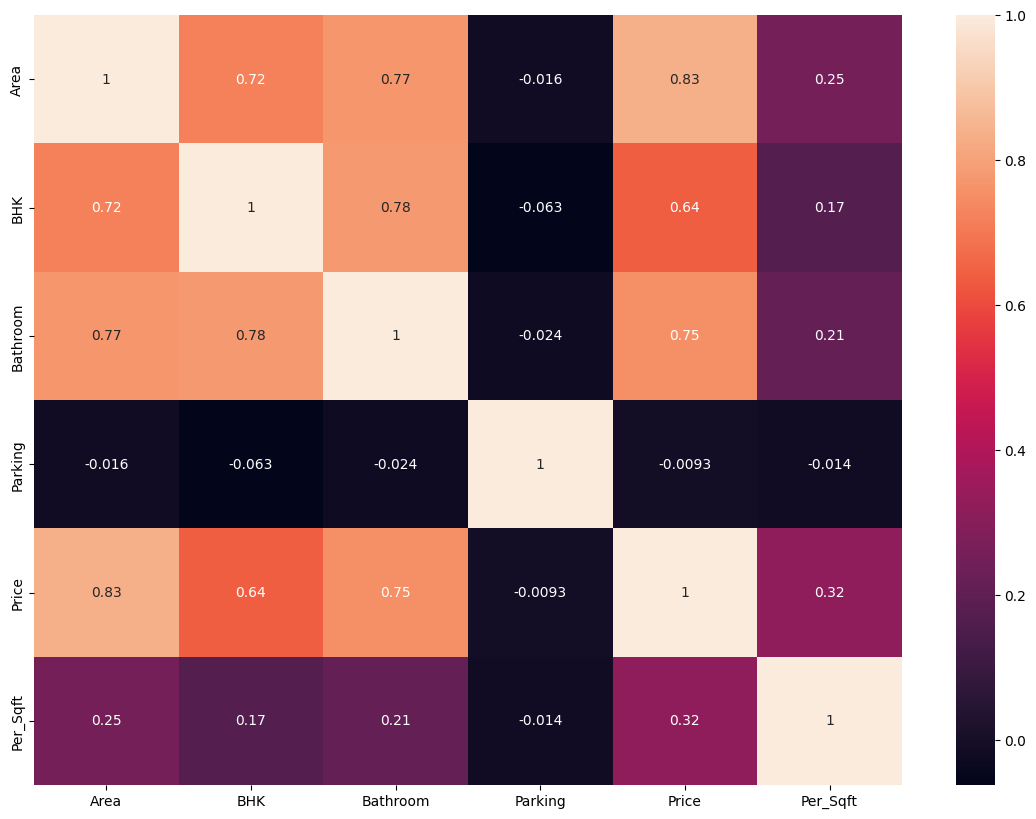

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(data=data.corr(), annot=True,)

In [68]:
# drop the 'Furnishing' and 'Parking' column, assuming that these two columns does not impact the price of house
data.drop(columns=['Furnishing','Parking'],inplace=True)


## 3.2. Data Preparation

### Encoding Categorical Variables

In [69]:
data.dtypes

Area           float64
BHK              int64
Bathroom       float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [70]:
data.head()

,Area,BHK,Bathroom,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [71]:
# Label encoding the categorical columns assuming the categorical columns to be Ordinal 
enco = LabelEncoder()

for var in data.columns:
    if data[var].dtypes == 'object':
        data[var] = enco.fit_transform(data[var])
 

In [72]:
data.head()

,Area,BHK,Bathroom,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,6500000,1,0,1,8125.0
1,750.0,2,2.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,6200000,1,0,1,6667.0


In [73]:
data.dtypes

Area           float64
BHK              int64
Bathroom       float64
Price            int64
Status           int32
Transaction      int32
Type             int32
Per_Sqft       float64
dtype: object

### Feature Scaling

In [74]:
# Feature scaling the independent variables using "Standarization"
scale = StandardScaler()
x = data.drop(['Price'],axis = 1)
scale.fit(x)

StandardScaler()

In [75]:
X = scale.fit_transform(x)
X

array([[-0.69993649,  0.2783335 , -0.53174944, ..., -1.28984383,
         0.94625796, -0.36181795],
       [-0.76379656, -0.86955224, -0.53174944, ..., -1.28984383,
        -1.05679428, -0.44428918],
       [-0.50835627, -0.86955224, -0.53174944, ...,  0.77528766,
        -1.05679428, -0.44428918],
       ...,
       [-0.38063612,  0.2783335 , -0.53174944, ...,  0.77528766,
         0.94625796, -0.09081679],
       [-0.60414638,  0.2783335 ,  0.50403611, ..., -1.28984383,
         0.94625796, -0.09081679],
       [-0.45726821, -0.86955224, -0.53174944, ...,  0.77528766,
         0.94625796, -0.09081679]])

In [76]:
y = data['Price']
y

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1253    16500000
1254    55000000
1255    12500000
1256    17500000
1257    11500000
Name: Price, Length: 1196, dtype: int64

### Splitting the Data

In [77]:
## Splitting the data in 'Train and Test'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (956, 7)
The shape of X_test is: (240, 7)
The shape of y_train is: (956,)
The shape of y_test is: (240,)



# **4. Linear Regression Models**

## 4.1. Linear Regression Model using Ordinary Least-Squares

In [78]:
# Create a LinearRegression instance
LR = LinearRegression()

# Fit the linear model using OLS
LR.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_ols = LR.predict(X_test)


In [80]:
Comparison = pd.DataFrame({'y_true' : y_test , 'y_pred' :y_pred_ols})
Comparison

,y_true,y_pred
126,14600000,8.767896e+06
1212,35000000,5.236933e+07
543,75000000,6.332238e+07
522,6000000,5.144382e+06
1080,22500000,2.586174e+07
...,...,...
481,93000000,7.635690e+07
833,1500000,-4.315901e+06
1071,5000000,8.432621e+06
937,9200000,8.512836e+06


In [81]:
# calculating the R-squared value for the model evaluation
r_squared_LR = r2_score(y_test, y_pred_ols)

n = len(X_test)
p = X_test.shape[1]

# calculating the Adjusted R-squared value
adj_r = 1 - ((1 - r_squared_LR) * (n - 1) / (n - p - 1))

# calculating the root mean square error value for the model evaluation
rmse_LR = sqrt(mean_squared_error(y_test, y_pred_ols))
rmse_LR

11287444.251649493

In [82]:
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_LR, 'Adj R-squared' : adj_r , 'RMSE' :rmse_LR})



# appending our result table
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.696508,0.68735,1.128744e+07


## 4.2. Linear Regression Model using Stochastic Gradient Descent

In [83]:
SGD = SGDRegressor(loss="squared_error",alpha = 0.1, max_iter = 1000, random_state=10)

# fit the model
SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.1, random_state=10)

In [84]:
y_pred_sgd = SGD.predict(X_test)

In [85]:
r_squared_SGD = r2_score(y_test, y_pred_sgd)

n = len(X_test)
p = X_test.shape[1]

adj_r_SGD = 1 - ((1 - r_squared_SGD) * (n - 1) / (n - p - 1))


rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_sgd))
rmse_SGD

10865944.698865077

In [86]:
# compiling the required information
SGD_metrics = pd.Series({'Model': "SGD",
                 'R-squared' : r_squared_SGD, 'Adj R-squared' : adj_r_SGD , 'RMSE' :rmse_SGD})



# appending our result table
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.696508,0.687350,1.128744e+07
1,SGD,0.718751,0.710265,1.086594e+07


## 4.3. Linear Regression Model using Random Forest

In [87]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [88]:
y_pred_rf = rf.predict(X_test)

In [89]:
r_squared_rf = r2_score(y_test, y_pred_rf)
r_squared_rf

n = len(X_test)
p = X_test.shape[1]

adj_r_rf = 1 - ((1 - r_squared_rf) * (n - 1) / (n - p - 1))


rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

9878693.069579748

In [90]:
# compiling the required information
RF_metrics = pd.Series({'Model': "Random Forest",
                 'R-squared' : r_squared_rf, 'Adj R-squared' : adj_r_rf , 'RMSE' :rmse_rf})



# appending our result table
result_tabulation = result_tabulation.append(RF_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.696508,0.687350,1.128744e+07
1,SGD,0.718751,0.710265,1.086594e+07
2,Random Forest,0.767536,0.760522,9.878693e+06


## 4.4. Linear Regression Model using Gradient Boosting


### Hyperparameter Tuning for Gradient Boosting

In [91]:
boost = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Define the grid search object
grid_search = GridSearchCV(
    estimator=boost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and mean squared error
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.9}
Best mean squared error: 65131408690200.73


### Model Fitting

In [92]:
boost = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, min_samples_split = 5, n_estimators = 100, subsample =  0.9, random_state=10)
# fit the model
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=5,
                          random_state=10, subsample=0.9)

In [93]:
y_pred_boost  = boost.predict(X_test)

In [94]:
r_squared_bo = r2_score(y_test, y_pred_boost)
r_squared_bo

n = len(X_test)
p = X_test.shape[1]

adj_r_bo = 1 - ((1 - r_squared_bo) * (n - 1) / (n - p - 1))


rmse_bo = sqrt(mean_squared_error(y_test, y_pred_boost))
rmse_bo

7580205.218506244

In [95]:
# compiling the required information
GB_metrics = pd.Series({'Model': "GradientBoosting",
                 'R-squared' : r_squared_bo, 'Adj R-squared' : adj_r_bo , 'RMSE' :rmse_bo})



# appending our result table
result_tabulation = result_tabulation.append(GB_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.696508,0.687350,1.128744e+07
1,SGD,0.718751,0.710265,1.086594e+07
2,Random Forest,0.767536,0.760522,9.878693e+06
3,GradientBoosting,0.863127,0.858997,7.580205e+06


## 4.5. Linear Regression Model using XG Boosting

### Hyperparameter Tuning for XG Boosting

In [96]:
XG = XGBRegressor()
params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV object
grid_search = GridSearchCV(XG, params, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and mean squared error
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best mean squared error: 63774713652280.85


### Model Fitting

In [97]:
XG = XGBRegressor(colsample_bytree = 1.0, n_estimators=100, learning_rate=0.1, max_depth = 3, subsample = 1.0,  random_state=10)
# fit the model
XG.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [98]:
y_pred_XG = XG.predict(X_test)

In [99]:
r_squared_XG = r2_score(y_test, y_pred_XG)
r_squared_XG

n = len(X_test)
p = X_test.shape[1]

adj_r_XG = 1 - ((1 - r_squared_XG) * (n - 1) / (n - p - 1))


rmse_XG = sqrt(mean_squared_error(y_test, y_pred_XG))
rmse_XG

7406601.141789344

In [100]:
# compiling the required information
XB_metrics = pd.Series({'Model': "XGBRegressor",
                 'R-squared' : r_squared_XG, 'Adj R-squared' : adj_r_XG , 'RMSE' :rmse_XG})



# appending our result table
result_tabulation = result_tabulation.append(XB_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.696508,0.687350,1.128744e+07
1,SGD,0.718751,0.710265,1.086594e+07
2,Random Forest,0.767536,0.760522,9.878693e+06
3,GradientBoosting,0.863127,0.858997,7.580205e+06
4,XGBRegressor,0.869324,0.865382,7.406601e+06


# **5. Conclusion**



<table align="left">
    <tr>
        <td width="8%">
            <img src="tick.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="Red">
                    <b>It can be seen from the result tabulation, that accuracy measures for the XGBoosting is better than all other models. <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

# **6. Save the Model**


In [101]:
import pickle
with open('Delhi_house_price_model.pickle', 'wb') as f:
    pickle.dump(XG, f)
    

In [102]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))